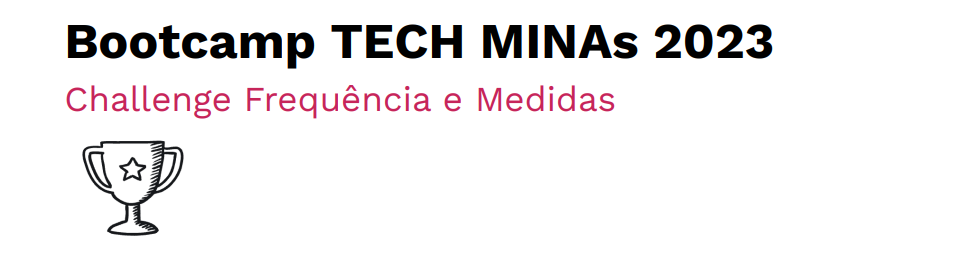

# Desafio 1: Entendendo os estudantes.


Esse desafio tem como objetivo responder algumas perguntas através da
análise de dados, aprofundando o conhecimento em frequência e medidas.
Os dados que deverão ser utilizado nesse script foram baixados do kaggle,
e podem ser acessados através do link:
https://www.kaggle.com/spscientist/students-performance-in-exams

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias
disciplinas e suas informações pessoais.
Variáveis:

● gender - gênero do aluno

● race/ethnicity - raça/etnia dos alunos

● parental level of education - grau de escolaridade dos pais

● lunch - tipo de almoço

● test preparation course - indica se fez curso preparatório

● math score - nota na prova de matematica

● reading score - nota na prova de leitura

● writing score - nota na prova de escrita

Os dados são arquivos em .csv

In [1]:
import pandas as pd

In [71]:
import seaborn as sns

In [3]:
dados = pd.read_csv('dados_StudentsPerformance.csv')

### 1. Leia a base de dados e faça uma análise inicial, como por exemplo,verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.


### 2. Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.


In [4]:
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
dados.shape

(1000, 8)

### 3. Verifique a quantidade de alunos em cada grupo racial/étnico.


In [12]:
dados['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

### 4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?


In [20]:
gender = dados['gender'].value_counts()
females = gender[0]
males = gender[1]
print(f'Há {females} mulheres e {males} homens no database.')

Há 518 mulheres e 482 homens no database.


### 5. Analise as notas de matemática dos alunos de forma mais completa possível.

In [66]:
math_score_min = dados['math score'].min()
print(f'A menor nota em matemática é {math_score_min}.')

A menor nota em matemática é 0.


In [65]:
math_score_max = dados['math score'].max()
print(f'A maior nota em matemática é {math_score_max}.')

A maior nota em matemática é 100.


In [67]:
media_math = dados['math score'].mean()
print(f'A média geral em matemática é {media_math}.')

A média geral em matemática é 66.089.


In [70]:
desvio_math = dados['math score'].std()
print(f'O desvio padrão em matemática é {desvio_math}.')

O desvio padrão em matemática é 15.16308009600945.


In [49]:
freq_math_score = pd.value_counts(
    pd.cut(
        x = dados['math score'],
        bins = 10,
        include_lowest = True
    ), 
    sort = False
)
freq_math_score

(-0.101, 10.0]      2
(10.0, 20.0]        2
(20.0, 30.0]       12
(30.0, 40.0]       34
(40.0, 50.0]      100
(50.0, 60.0]      189
(60.0, 70.0]      270
(70.0, 80.0]      215
(80.0, 90.0]      126
(90.0, 100.0]      50
Name: math score, dtype: int64

In [51]:
perc_math_score = pd.value_counts(
    pd.cut(
        x = dados['math score'],
        bins = 10,
        include_lowest=True
    ),
    normalize=True,
    sort=False
)
perc_math_score

(-0.101, 10.0]    0.002
(10.0, 20.0]      0.002
(20.0, 30.0]      0.012
(30.0, 40.0]      0.034
(40.0, 50.0]      0.100
(50.0, 60.0]      0.189
(60.0, 70.0]      0.270
(70.0, 80.0]      0.215
(80.0, 90.0]      0.126
(90.0, 100.0]     0.050
Name: math score, dtype: float64

In [52]:
freq_perc_math_score = pd.DataFrame({'Frequência': freq_math_score, 'Porcentagem': perc_math_score})
freq_perc_math_score

,Frequência,Porcentagem
"(-0.101, 10.0]",2,0.002
"(10.0, 20.0]",2,0.002
"(20.0, 30.0]",12,0.012
"(30.0, 40.0]",34,0.034
"(40.0, 50.0]",100,0.100
"(50.0, 60.0]",189,0.189
"(60.0, 70.0]",270,0.270
"(70.0, 80.0]",215,0.215
"(80.0, 90.0]",126,0.126
"(90.0, 100.0]",50,0.050


In [63]:
media_math_gender = dados.groupby(['gender'])['math score'].mean()
print(f'A nota média de mulheres em matemática é {int(media_math_gender[0])}.')
print(f'A nota média de homens em matemática é {int(media_math_gender[1])}.')

A nota média de mulheres em matemática é 63.
A nota média de homens em matemática é 68.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


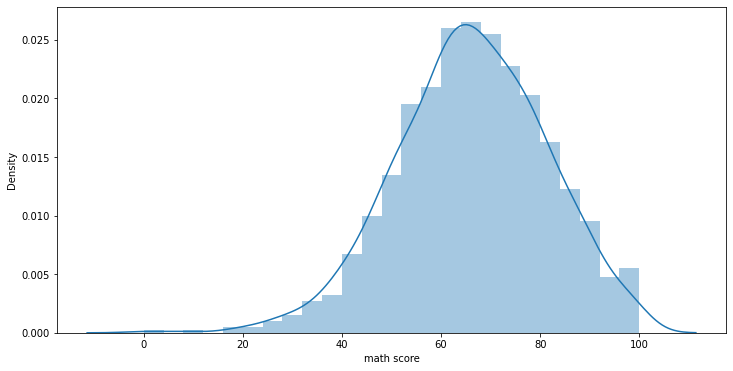

In [73]:
ax = sns.distplot(dados['math score'])
ax.figure.set_size_inches(12, 6)

<AxesSubplot:title={'center':'Matemática'}, xlabel='Notas'>

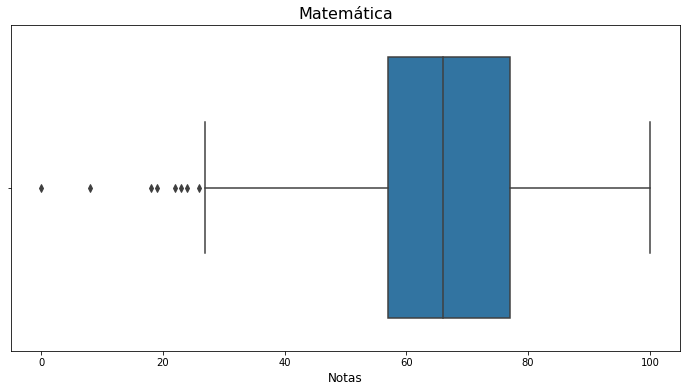

In [76]:
ax = sns.boxplot(x = 'math score', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Matemática', fontsize=16)
ax.set_xlabel('Notas', fontsize=12)
ax

### Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?


In [79]:
dados['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [94]:
media_math_parents = dados.groupby(['parental level of education'])['math score'].mean()
media_math_parents

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

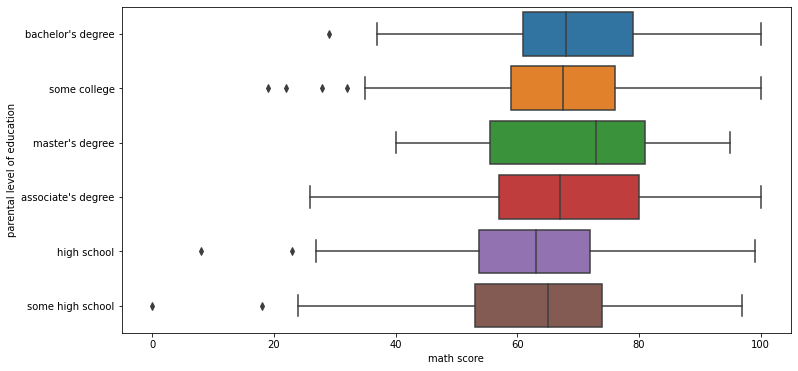

In [100]:
ax = sns.boxplot(x = 'math score', y = 'parental level of education', data=dados, orient='h')
ax.figure.set_size_inches(12, 6)

### Faça a mesma análise para as notas de leitura e escrita.


In [102]:
dados.groupby(['parental level of education'])['writing score'].mean()

parental level of education
associate's degree    69.896396
bachelor's degree     73.381356
high school           62.448980
master's degree       75.677966
some college          68.840708
some high school      64.888268
Name: writing score, dtype: float64

In [103]:
dados.groupby(['parental level of education'])['writing score'].mad()

parental level of education
associate's degree    11.704732
bachelor's degree     11.792157
high school           11.448563
master's degree       11.165182
some college          11.845955
some high school      12.867201
Name: writing score, dtype: float64

In [104]:
dados.groupby(['parental level of education'])['writing score'].std()

parental level of education
associate's degree    14.311122
bachelor's degree     14.728262
high school           14.085907
master's degree       13.730711
some college          15.012331
some high school      15.736197
Name: writing score, dtype: float64

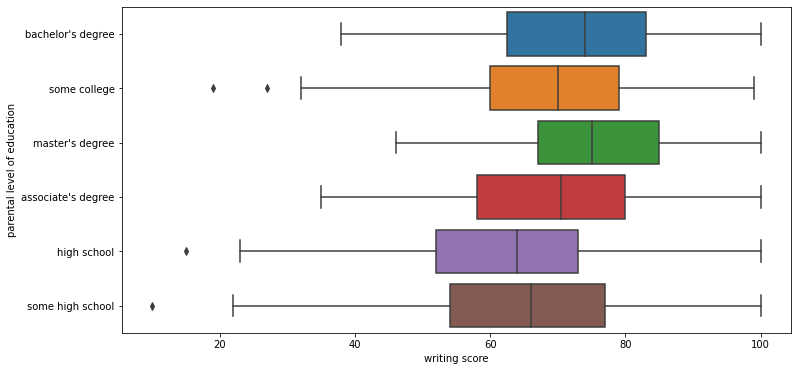

In [106]:
ax = sns.boxplot(x = 'writing score', y = 'parental level of education', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 6)

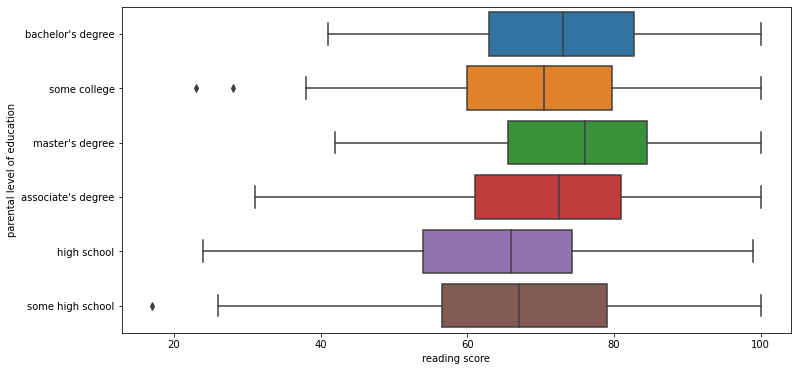

In [107]:
ax = sns.boxplot(x = 'reading score', y = 'parental level of education', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 6)

### Verifique gráficamente a relação da nota de leitura e de escrita.


In [111]:
dados['reading score'].quantile([0.25, 0.5, 0.75])

0.25    59.0
0.50    70.0
0.75    79.0
Name: reading score, dtype: float64

In [120]:
dados['writing score'].quantile([0.25, 0.5, 0.75])

0.25    57.75
0.50    69.00
0.75    79.00
Name: writing score, dtype: float64

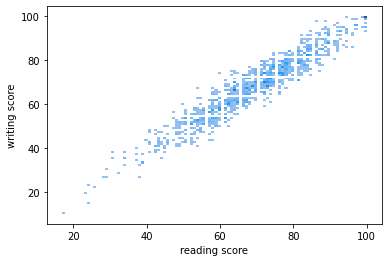

In [119]:
ax = sns.histplot(dados, x = 'reading score', y = 'writing score', bins=100)

### Atividade extra:
Análise mais algum dado que seja interessante avaliar e represente
graficamente, através de boxplot, histogramas, barplot dentre outros
diversos de livre escolha.

In [121]:
dados['test preparation course']

0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test preparation course, Length: 1000, dtype: object

Text(0.5, 0, 'nota')

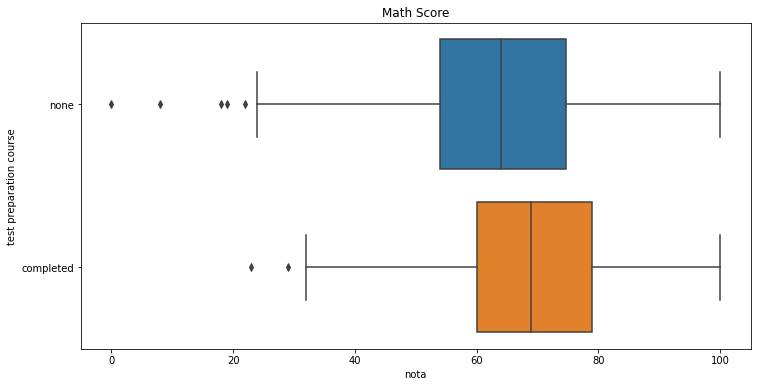

In [125]:
ax = sns.boxplot(x = 'math score', y = 'test preparation course', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Math Score')
ax.set_xlabel('nota')

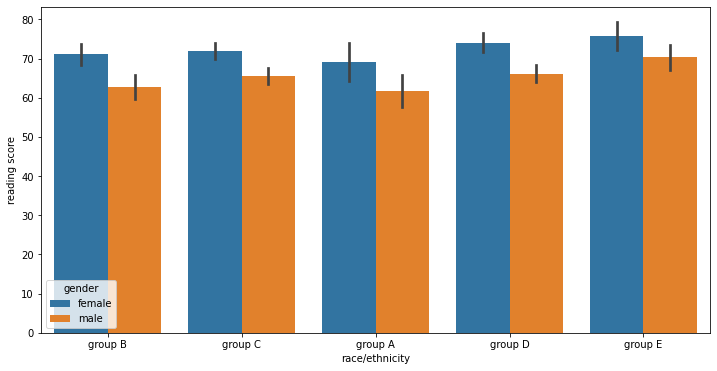

In [130]:
ax = sns.barplot(data = dados, x = 'race/ethnicity', y = 'reading score', hue='gender')
ax.figure.set_size_inches(12,6)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


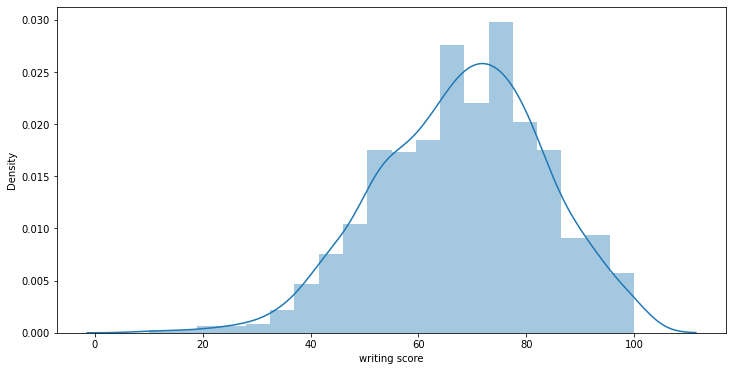

In [135]:
ax = sns.distplot(dados['writing score'], bins = 20)
ax.figure.set_size_inches(12,6)